In [10]:
# import liabrary

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

In [11]:
# import dataset

df=pd.read_csv('Customer segmentation.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
# drop unnecessary column

df.drop('CustomerID',axis=1,inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [13]:
df.shape

(200, 4)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [15]:
df.describe

<bound method NDFrame.describe of      Gender  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

[200 rows x 4 columns]>

<Axes: >

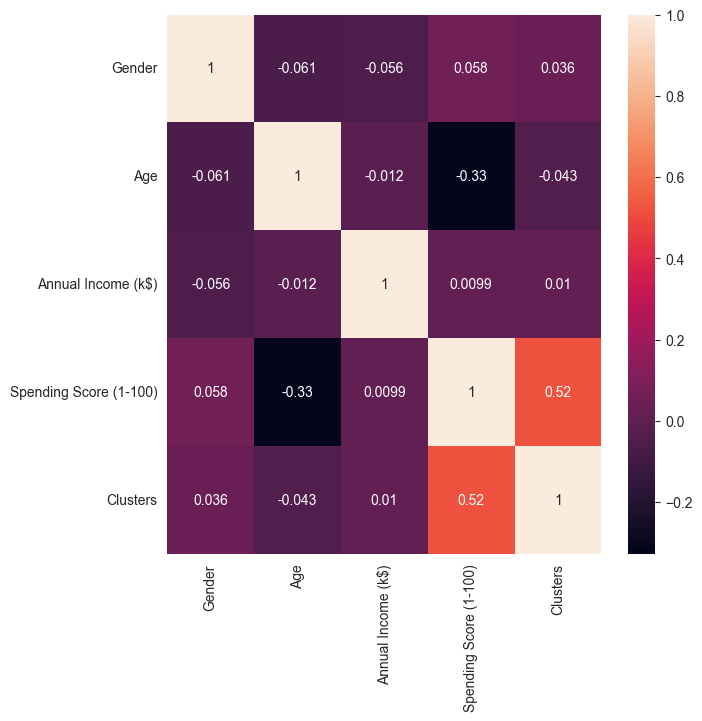

In [53]:
corrMatrics=df.corr()
sns.heatmap(df.corr() , annot=True)

C:\Users\Rowtech\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


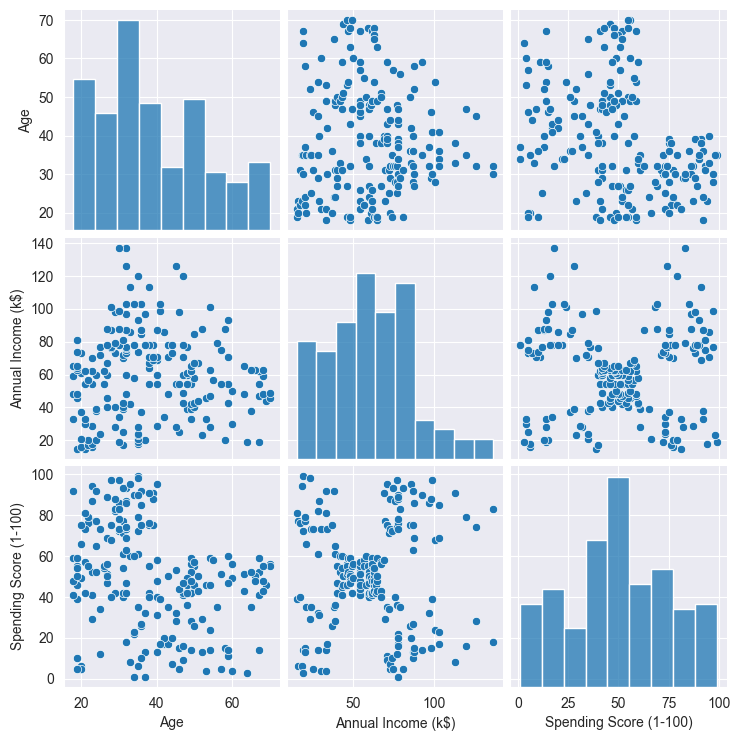

In [22]:
sns.pairplot(df)

In [23]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

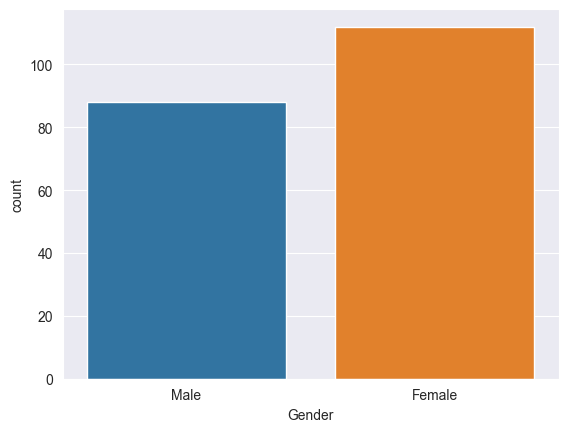

In [24]:
sns.countplot(x='Gender',data=df)

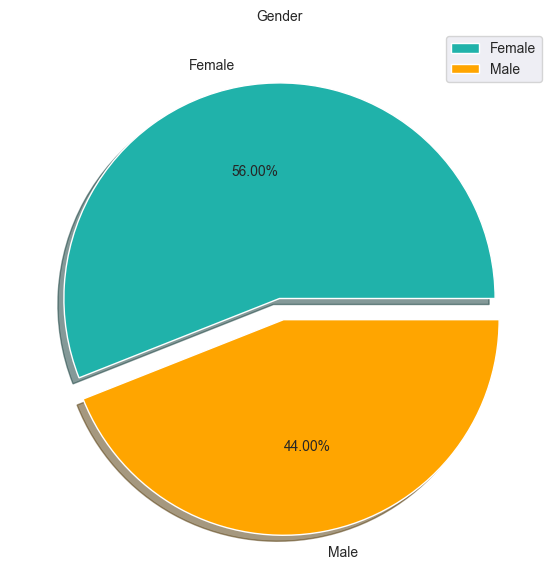

In [25]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['lightseagreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 10)
plt.axis('off')
plt.legend()
plt.show()

<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

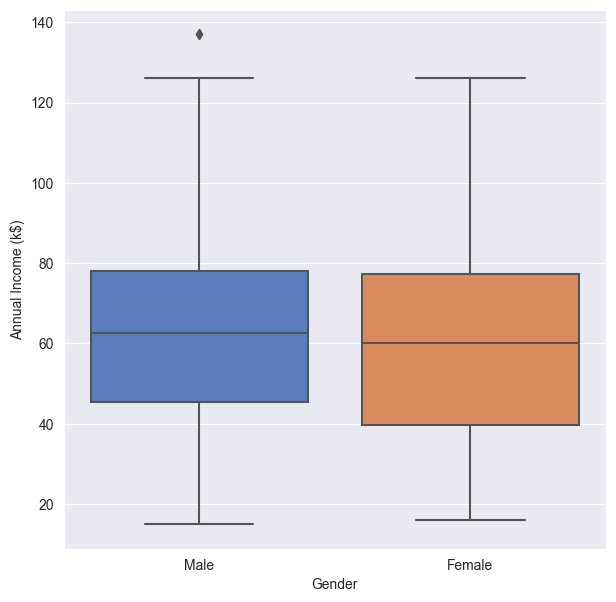

In [26]:
sns.boxplot(x='Gender',y='Annual Income (k$)',data=df,palette='muted')

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

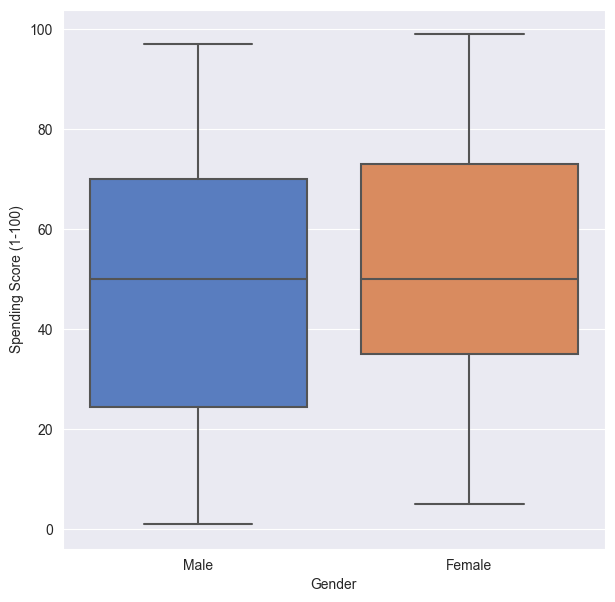

In [27]:
sns.boxplot(x='Gender',y='Spending Score (1-100)',data=df,palette='muted')

In [28]:
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


<Axes: xlabel='Age', ylabel='Count'>

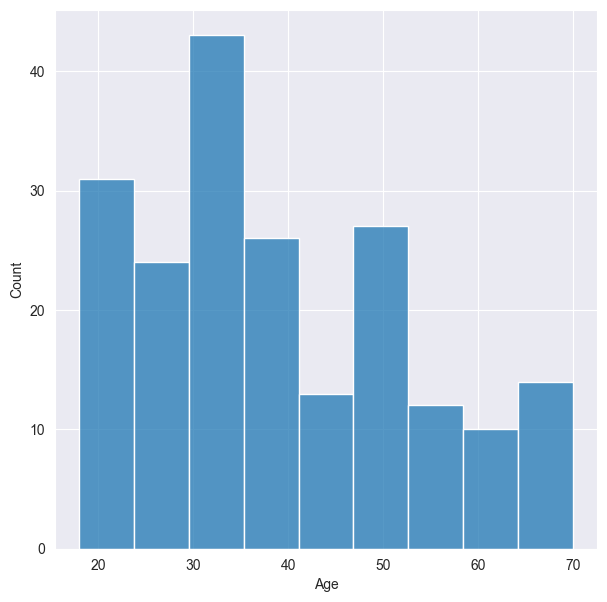

In [29]:
sns.histplot(x='Age',data=df)sns.histplot(x='Age',hue='Gender',data=df)

<Axes: xlabel='Age', ylabel='Count'>

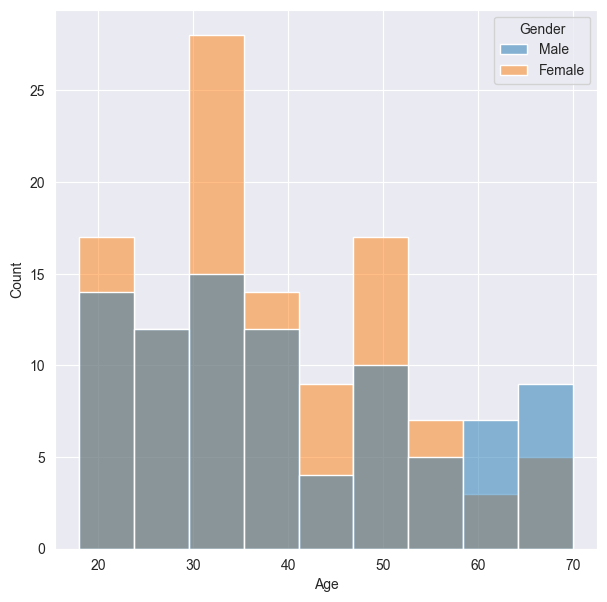

In [30]:
sns.histplot(x='Age',hue='Gender',data=df)

C:\Users\Rowtech\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(41.999097222222204, 0.5, 'Annual Income (k$)')

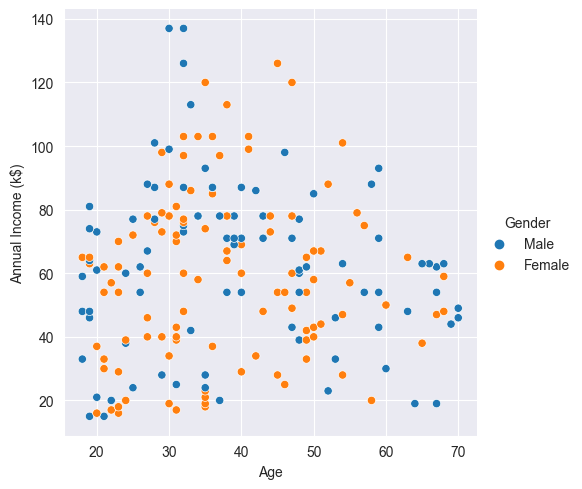

In [31]:
sns.relplot(x='Age',y='Annual Income (k$)',data=df,hue='Gender',kind='scatter')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

C:\Users\Rowtech\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(41.999097222222204, 0.5, 'Spending Score (1-100)')

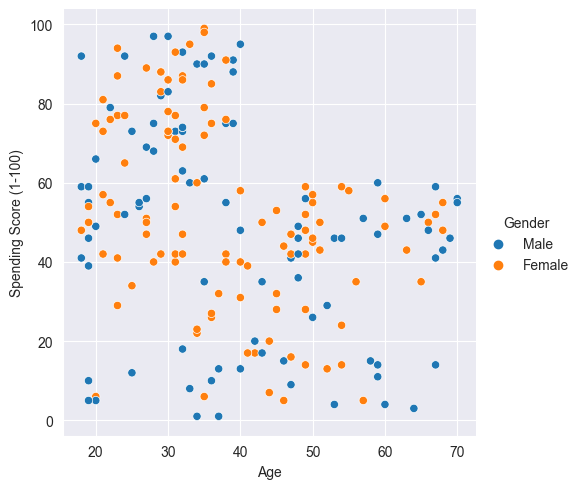

In [32]:
sns.relplot(x='Age',y='Spending Score (1-100)',data=df,hue='Gender',kind='scatter')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

C:\Users\Rowtech\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(5.569444444444445, 0.5, 'Spending Score (1-100)')

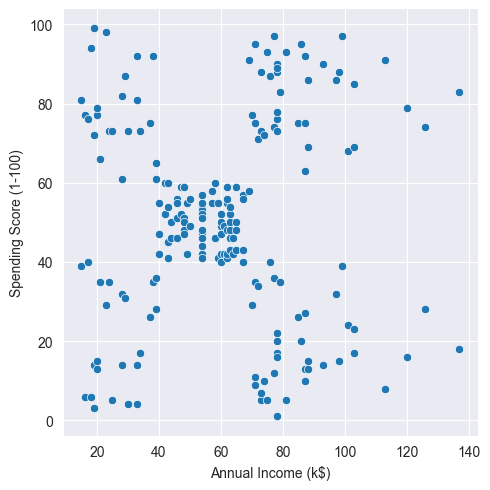

In [36]:
sns.relplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,kind='scatter')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

C:\Users\Rowtech\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(41.999097222222204, 0.5, 'Spending Score (1-100)')

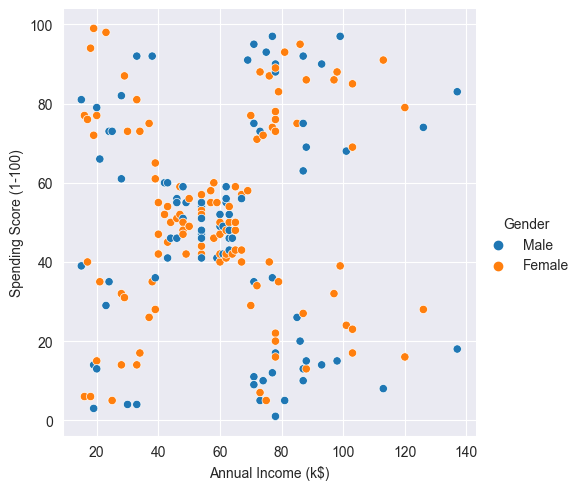

In [34]:
sns.relplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,hue='Gender',kind='scatter')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [35]:
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


#  K-Means Clusturning

In [37]:
# 0 represents Male
# 1 represents Female

df['Gender'].replace({'Male':0,'Female':1},inplace=True)

In [38]:
df['Gender'].dtype

dtype('int64')

In [39]:
from sklearn.cluster import KMeans

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
lst = []
for i in range(1,11):
    k_model= KMeans(n_clusters = i, n_init = 15, max_iter = 500) 
    k_model.fit(df)
    lst.append(k_model.inertia_)

In [42]:
lst

[308862.06000000006,
 212889.44245524303,
 143391.59236035676,
 104414.67534220168,
 75412.59682443162,
 58350.65449462818,
 51132.703212576904,
 44357.6215098352,
 40670.989962363215,
 37756.71552721788]

Text(0.5, 1.0, 'Elbow Theroy')

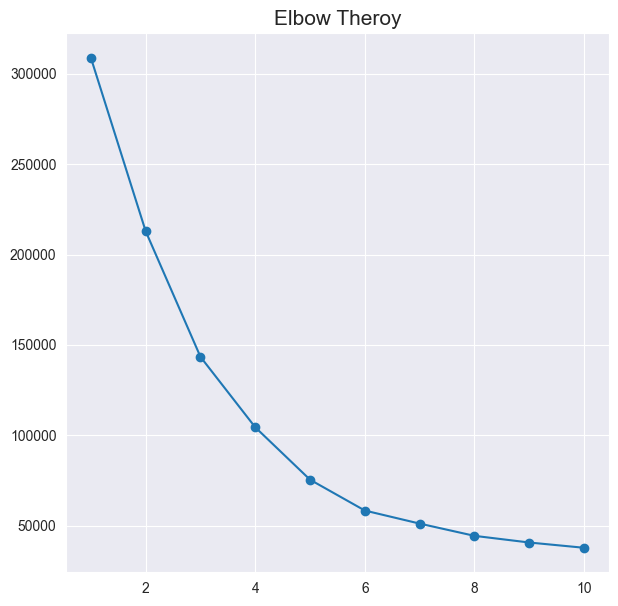

In [43]:
plt.plot(range(1,11), lst, marker = 'o')
plt.title('Elbow Theroy',fontsize=15)

In [44]:
k_model = KMeans(n_clusters = 5)

In [45]:
k_model.fit(df)

C:\Users\Rowtech\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [47]:
prediction = k_model.predict(df)

In [48]:
k_model.cluster_centers_

array([[ 0.47222222, 40.66666667, 87.75      , 17.58333333],
       [ 0.60869565, 25.52173913, 26.30434783, 78.56521739],
       [ 0.58227848, 43.08860759, 55.29113924, 49.56962025],
       [ 0.60869565, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.53846154, 32.69230769, 86.53846154, 82.12820513]])

In [49]:
len(k_model.cluster_centers_)

5

In [50]:
df['Clusters'] = prediction

In [51]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,0,19,15,39,3
1,0,21,15,81,1
2,1,20,16,6,3
3,1,23,16,77,1
4,1,31,17,40,3


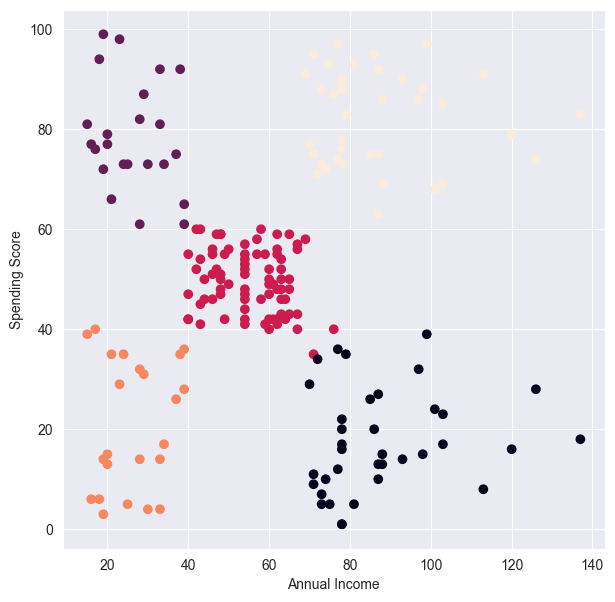

In [52]:
# Visualizing clusters by comparing Spending Score and Annual Income

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Clusters'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()